In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
glcm_df = pd.read_csv("glcm_daun_herbal.csv")

In [4]:
glcm_df.head()

X = glcm_df.iloc[:, :-1].values  
y = glcm_df.iloc[:, 24].values


print(X,"\n\n", y)

[[2.15516905 2.12828158 1.57377761 ... 0.87319862 0.87541382 0.87372386]
 [2.74554302 2.72999087 2.33979724 ... 0.8355909  0.83750832 0.83565643]
 [2.21988617 2.06405271 1.73408891 ... 0.85594372 0.85792735 0.85600125]
 ...
 [1.25172172 1.02591336 0.41265305 ... 0.98129914 0.98279227 0.9812078 ]
 [1.34750773 1.10200287 0.38796385 ... 0.98054245 0.98229016 0.98050658]
 [0.98182125 0.77385178 0.30247832 ... 0.98648235 0.98761336 0.98620835]] 

 ['bayammerah' 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah'
 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah'
 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah'
 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah'
 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah'
 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah' 'bayammerah'
 'binahongmerah' 'binahongmerah' 'binahongmerah' 'binahongmerah'
 'binahongmerah' 'binahongmerah' 'binahongmerah' 'binahongmerah'
 'binahongmerah' 'binahongm

In [5]:
label_distr = glcm_df['label'].value_counts()

label_name = ['bayammerah','binahongmerah','insulin','jambubiji','jarak', 'katuk', 'kembangsepatu', 'kumiskucing', 'mangkok', 'salam', 'seri', 'sirihmerah', 'sirsak', 'tapakdara', 'urangaring']


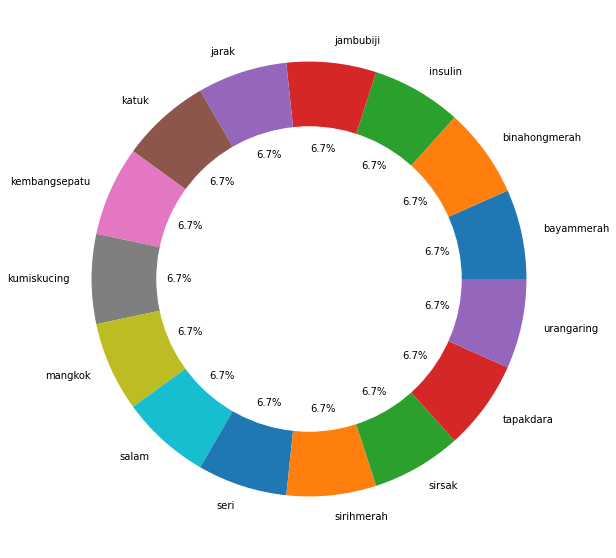

In [6]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [7]:
print(label_distr)

kumiskucing      30
katuk            30
kembangsepatu    30
sirih            30
jarak            30
urangaring       30
jambubiji        30
mangkok          30
binahongmerah    30
sirsak           30
tapakdara        30
insulin          30
salam            30
bayammerah       30
seri             30
Name: label, dtype: int64


In [8]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

# le = LabelEncoder()
# le.fit(glcm_df["label"].values)


# print(" categorical label : \n", le.classes_)

# Y = le.transform(glcm_df['label'].values)
# Y = to_categorical(Y)

# print("\n\n one hot encoding for sample 0 : \n", X[0])
# print("\n\n one hot encoding for sample 0 : \n", Y[0])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# print("Dimensi data :\n")
# print("X train \t X test \t Yz train \t Yz test")  
# print("%s \t %s \t %s \t %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

In [9]:
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print("Dimensi data :\n")
print("X train \t X test \t Y train \t Y test")  
print("%s \t %s \t %s \t %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

print("\n X_train : \n",X_train,"\n")
print("X_test : \n",X_test,"\n")

print("y_train : \n",y_train,"\n")
print("y_test : \n",y_test,"\n")

counter_train = Counter(y_train)
counter_test = Counter(y_test)


result_train = [(key, counter_train[key]) for key in counter_train]
result_test = [(key2, counter_test[key2]) for key2 in counter_test]


print("result_train : \n",result_train)
print("result_test : \n",result_test)

Dimensi data :

X train 	 X test 	 Y train 	 Y test
(360, 24) 	 (90, 24) 	 (360,) 	 (90,)

 X_train : 
 [[3.70778217 3.99044885 3.48919929 ... 0.72767706 0.73021133 0.72790599]
 [2.69033759 2.77760308 2.45375635 ... 0.84565991 0.84744109 0.84559221]
 [4.3977949  4.41727557 4.01169011 ... 0.71087139 0.71441139 0.71045366]
 ...
 [2.59190727 2.3319285  1.57066068 ... 0.88105774 0.88394837 0.8810545 ]
 [2.26778892 1.97004828 1.14806067 ... 0.92436246 0.92668278 0.9241048 ]
 [4.5612282  4.77353862 4.24159125 ... 0.66875952 0.6717183  0.66873273]] 

X_test : 
 [[ 2.79334182  2.4289144   1.39845838 ...  0.87198362  0.87525767
   0.87203632]
 [ 2.68010473  2.26225861  1.17740906 ...  0.8993579   0.90283177
   0.89918185]
 [ 2.36070324  2.02605037  1.20019311 ...  0.91694813  0.9194188
   0.91678825]
 ...
 [10.26474506 10.53165123  9.3672016  ...  0.28217642  0.28908537
   0.28261697]
 [ 1.86746017  1.59971947  0.85625508 ...  0.93395529  0.93625681
   0.93391612]
 [ 1.97240053  1.70450809  0.9

In [10]:
# from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)

import pickle

# Its important to use binary mode 
datalatih = open('datalatih', 'wb') 

# source, destination 
pickle.dump(X_train, datalatih)  


X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)

print("X_train : \n" ,X_train_scaled,"\n")
print("X_test : \n" ,X_test_scaled,"\n")

X_train : 
 [[-0.1049858   0.07588204  0.2166784  ... -0.61724351 -0.62893522
  -0.6154516 ]
 [-0.52917327 -0.41792652 -0.23595149 ...  0.31627248  0.30732576
   0.3158114 ]
 [ 0.18269057  0.24966397  0.4450782  ... -0.75021502 -0.75512225
  -0.75355365]
 ...
 [-0.5702103  -0.59938234 -0.62198484 ...  0.59635082  0.59889291
   0.59642811]
 [-0.70533996 -0.7467214  -0.80671872 ...  0.93899086  0.94019325
   0.9370895 ]
 [ 0.25082829  0.39471601  0.54557638 ... -1.08341687 -1.09609258
  -1.08369563]] 

X_test : 
 [[-0.4862293  -0.55989466 -0.69726074 ...  0.52455366  0.52948422
   0.52506631]
 [-0.5334395  -0.62774835 -0.79388947 ...  0.74114723  0.74970607
   0.73987168]
 [-0.66660263 -0.72392022 -0.78392973 ...  0.88032645  0.88217914
   0.87919293]
 ...
 [ 2.62870759  2.73912397  2.7861677  ... -4.14217936 -4.15200862
  -4.13906877]
 [-0.87224285 -0.89750029 -0.93427759 ...  1.01489222  1.01665673
   1.01472747]
 [-0.82849169 -0.85483574 -0.90546913 ...  0.99686828  0.99938625
   0.99

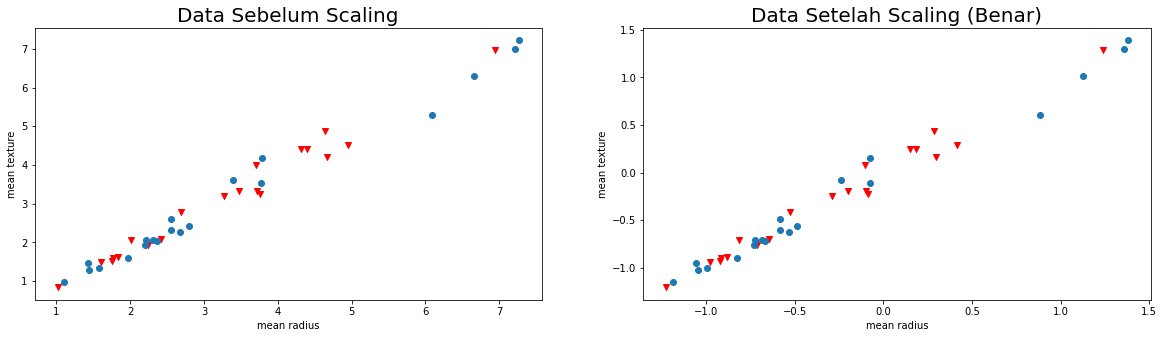

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.scatter(X_train[:20, 0], X_train[:20, 1], c='red', marker='v')
ax1.scatter(X_test[:20, 0], X_test[:20, 1])
ax1.set_title('Data Sebelum Scaling', fontsize=20)
ax1.set_xlabel('mean radius')
ax1.set_ylabel('mean texture')


ax2.scatter(X_train_scaled[:20, 0], X_train_scaled[:20, 1], c='red', marker='v')
ax2.scatter(X_test_scaled[:20, 0], X_test_scaled[:20, 1])
ax2.set_title('Data Setelah Scaling (Benar)', fontsize=20)
ax2.set_xlabel('mean radius')
ax2.set_ylabel('mean texture')

plt.savefig('scaling.png')

Text(0, 0.5, 'Error rata-rata')

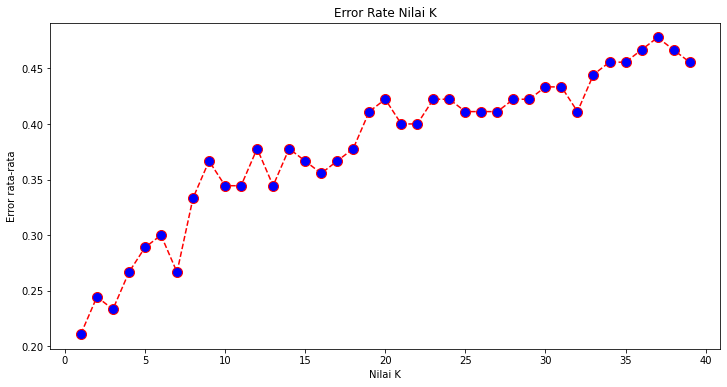

In [12]:
from sklearn.neighbors import KNeighborsClassifier 

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')



In [13]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
 # predict test data
y_pred=classifier.predict(X_test_scaled)
print(classifier.score(X_test_scaled, y_test))

0.7666666666666667


In [15]:
from sklearn.metrics import classification_report, confusion_matrix  


# import itertools
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     plt.figure(figsize=(10, 10))
    
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
    
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.show()
    
#  # predict test data
# y_pred=classifier.predict(X_test_scaled)


# # Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# np.set_printoptions(precision=2)


# # Plot non-normalized confusion matrix
# plot_confusion_matrix(cnf_matrix, 
#                       classes=['bayammerah','binahongmerah','insulin','jambubiji','jarak', 'katuk', 'kembangsepatu', 'kumiskucing', 'mangkok', 'salam', 'seri', 'sirihmerah', 'sirsak', 'tapakdara', 'urangaring'],
#                       normalize=False,
#                       title='Confusion matrix, with normalization')


print(confusion_matrix(y_test, y_pred))  

print(classification_report(y_test, 
                            y_pred, 
                            target_names=['bayammerah','binahongmerah','insulin','jambubiji','jarak', 'katuk', 'kembangsepatu', 'kumiskucing', 'mangkok', 'salam', 'seri', 'sirihmerah', 'sirsak', 'tapakdara', 'urangaring']))


[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 3 0 0 0 0 0 1 2 0 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 9 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 7 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 1 0 3 0 0 0 0 0 0]
 [0 0 0 1 0 2 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 8 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]
               precision    recall  f1-score   support

   bayammerah       0.86      1.00      0.92         6
binahongmerah       0.43      1.00      0.60         3
      insulin       1.00      1.00      1.00         2
    jambubiji       0.60      0.33      0.43         9
        jarak       0.50      0.33      0.40         3
        katuk       0.82      0.82      0.82        11
kembangsepatu       0.78      0.88      0.82         8
  kumiskucing       0.75      1.00      0.86         6
      ma

In [16]:
# import pickle

# Its important to use binary mode 
knnPickle = open('model_baru', 'wb') 

# source, destination 
pickle.dump(classifier, knnPickle)                      


# load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

In [17]:
# import tensorflow as tf
# converter = tf.lite.TFLiteConverter.from_session_graph( inputs, outputs )
# buffer = converter.convert()
# open( "model.tflite", 'wb' ).write(buffer)